In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!ls "/content/drive/My Drive/Energy_Consumption"

2018			     hi4udqbw45ka3vvtul6di1sy9_0a603001-a3fc-4c8c-993f-eda0ac76adc4.csv
df_holiday_encode.pickle.gz  Note_Links.gdoc
df_holiday.pickle.gz	     processed_sensor_data.csv
df_merged.pickle.gz	     Smart_Environments.pptx
df_weather.pickle.gz	     test4.ipynb
Floors


In [ ]:
import os
import pandas as pd


root_path = "/content/drive/My Drive/Energy_Consumption"


In [ ]:
feature_selected = "z1_Plug(kW)"


In [ ]:
import os
for dirname, _, filenames in os.walk("/content/drive/My Drive/Energy_Consumption" + "/2018"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/Energy_Consumption/2018/2019Floor7.csv
/content/drive/My Drive/Energy_Consumption/2018/2018Floor7.csv


In [ ]:
import pandas as pd

# Full path to the CSV file
file_path = "/content/drive/My Drive/Energy_Consumption/2018/2019Floor7.csv"

# Read the CSV data into a pandas DataFrame
df_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify it's loaded correctly
df_data.head()


,Date,z1_AC1(kW),z1_AC2(kW),z1_AC3(kW),z1_AC4(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),...,z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(degC),z5_S1(RH%),z5_S1(lux)
0,2019-01-01 00:00:00,0.0,0.0,0.01,0.0,0.0,0.13,NaN,NaN,NaN,...,0.01,NaN,NaN,NaN,0.0,0.0,0.08,NaN,NaN,NaN
1,2019-01-01 00:01:00,0.0,0.0,0.01,0.0,0.0,0.12,NaN,NaN,NaN,...,0.01,NaN,NaN,NaN,0.0,0.0,0.08,NaN,NaN,NaN
2,2019-01-01 00:02:00,0.0,0.0,0.01,0.0,0.0,0.13,NaN,NaN,NaN,...,0.01,NaN,NaN,NaN,0.0,0.0,0.08,NaN,NaN,NaN
3,2019-01-01 00:03:00,0.0,0.0,0.01,0.0,0.0,0.12,NaN,NaN,NaN,...,0.01,NaN,NaN,NaN,0.0,0.0,0.08,NaN,NaN,NaN
4,2019-01-01 00:04:00,0.0,0.0,0.01,0.0,0.0,0.12,NaN,NaN,NaN,...,0.01,NaN,NaN,NaN,0.0,0.0,0.08,NaN,NaN,NaN


In [ ]:
df_data['Date'] = pd.to_datetime(df_data['Date'])

In [ ]:
# Set the 'Date' column as the index
df_data.set_index('Date', inplace=True)

In [ ]:
# Select columns containing 'kW' in their name
df_powerMeter = df_data.loc[:, df_data.columns.str.contains('kW')].copy()

In [ ]:
# Sum the kW columns row-wise and rename the Series to 'total_demand'
df_powerMeter = df_powerMeter.sum(axis=1).rename('total_demand')

In [ ]:
# Now, resample by hour and calculate the mean
df_powerMeter = df_powerMeter.resample('H').mean()

In [ ]:
# Display the resampled data
df_powerMeter

Date
2019-01-01 00:00:00    0.470333
2019-01-01 01:00:00    0.429333
2019-01-01 02:00:00    0.446167
2019-01-01 03:00:00    0.440167
2019-01-01 04:00:00    0.346667
                         ...   
2019-12-31 19:00:00    0.417000
2019-12-31 20:00:00    0.401833
2019-12-31 21:00:00    0.435667
2019-12-31 22:00:00    0.396833
2019-12-31 23:00:00    0.440167
Freq: H, Name: total_demand, Length: 8760, dtype: float64

<Axes: xlabel='Date'>

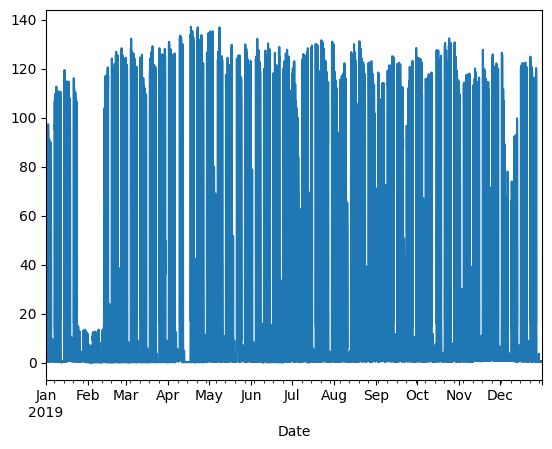

In [ ]:
df_powerMeter.plot()

In [ ]:
# Prepare data for modeling
df_temp = df_powerMeter.reset_index().copy()
df_temp = df_temp.dropna()

In [ ]:
# Add timestamp features
df_temp['weekday'] = df_temp['Date'].dt.weekday
df_temp['hour'] = df_temp['Date'].dt.hour
df_temp['date'] =pd.to_datetime(df_temp['Date'].dt.date)

df_temp = df_temp.set_index('Date').drop(['date'],axis=1)

df_temp = df_temp.rename(columns={'total_demand':'total_demand_meas'})

df_temp

,total_demand_meas,weekday,hour
Date,,,
2019-01-01 00:00:00,0.470333,1,0
2019-01-01 01:00:00,0.429333,1,1
2019-01-01 02:00:00,0.446167,1,2
2019-01-01 03:00:00,0.440167,1,3
2019-01-01 04:00:00,0.346667,1,4
...,...,...,...
2019-12-31 19:00:00,0.417000,1,19
2019-12-31 20:00:00,0.401833,1,20
2019-12-31 21:00:00,0.435667,1,21


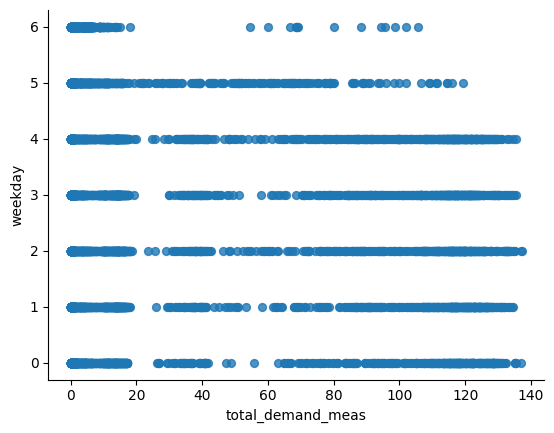

In [ ]:
# @title total_demand_meas vs weekday

from matplotlib import pyplot as plt
df_temp.plot(kind='scatter', x='total_demand_meas', y='weekday', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
feature_selected = "total_demand_meas"



In [ ]:
df_data1 = df_temp.copy()

In [ ]:
df_data = df_data1[(df_data1.index <= '2019-10-01 00:00:00')]
df_test = df_data1[(df_data1.index >= '2019-10-01 00:00:00') & ( df_data1.index < '2019-10-07 00:00:00')]

In [ ]:
len(df_test)

144

In [ ]:
df_data = df_data[(df_data[feature_selected] > 0)]

In [ ]:
df_data.describe()

,total_demand_meas,weekday,hour
count,6548.000000,6548.000000,6548.000000
mean,28.980985,2.998473,11.498778
std,44.322628,2.000381,6.920803
min,0.014833,0.000000,0.000000
25%,0.501333,1.000000,5.750000
50%,3.844417,3.000000,11.500000
75%,39.451375,5.000000,17.000000
max,137.147333,6.000000,23.000000


In [ ]:
from statsmodels.tsa import stattools
adf_result = stattools.adfuller(df_data[feature_selected], autolag='AIC')
print(f'The number of lags used: {adf_result[2]}')
print(f'The number of observations used: {adf_result[3]}')
for key, value in adf_result[4].items():
    print('Critial Values:')
    print(f' {key}, {round(value,4)}')

The number of lags used: 35
The number of observations used: 6512
Critial Values:
 1%, -3.4314
Critial Values:
 5%, -2.862
Critial Values:
 10%, -2.567


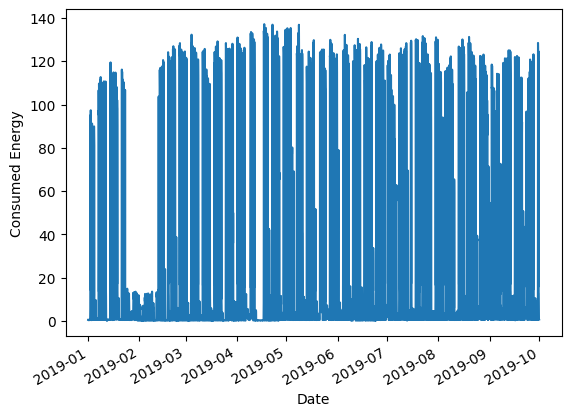

In [ ]:
import matplotlib.pyplot as plt

# Your plotting code
ax = df_data[feature_selected].plot()
ax.set_ylabel('Consumed Energy')  # Setting the label for the y-axis
ax.set_xlabel('Date')  # Setting the label for the x-axis
plt.show()  # Display the plot



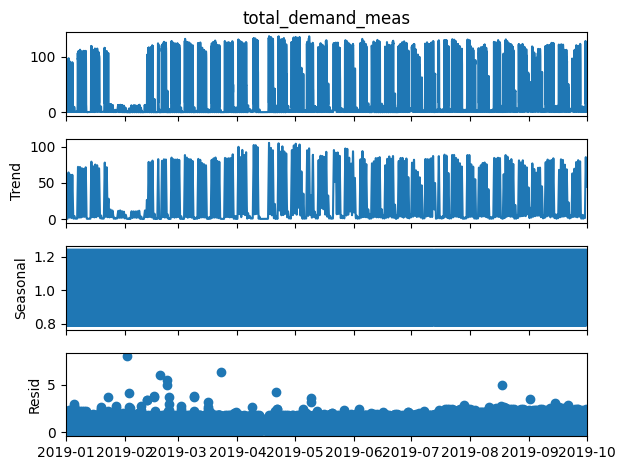

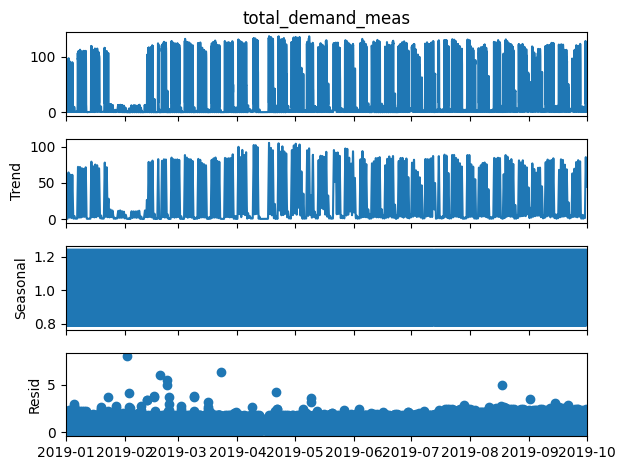

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# ETS Decomposition
result = seasonal_decompose(df_data[feature_selected],  period=12,
                            model ='multiplicative')

# ETS plot
result.plot()

In [ ]:
df_copy = df_data.copy()

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.2 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function
stepwise_fit = auto_arima(df_copy[feature_selected], start_p = 1, start_q = 1,
                          max_p = 5, max_q = 5, m = 5,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise

# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[5] intercept   : AIC=inf, Time=25.78 sec
 ARIMA(0,0,0)(0,1,0)[5] intercept   : AIC=46047.963, Time=0.40 sec
 ARIMA(1,0,0)(1,1,0)[5] intercept   : AIC=41723.011, Time=7.94 sec
 ARIMA(0,0,1)(0,1,1)[5] intercept   : AIC=inf, Time=10.41 sec
 ARIMA(0,0,0)(0,1,0)[5]             : AIC=46045.963, Time=0.17 sec
 ARIMA(1,0,0)(0,1,0)[5] intercept   : AIC=41790.812, Time=0.54 sec
 ARIMA(1,0,0)(2,1,0)[5] intercept   : AIC=41170.537, Time=6.65 sec
 ARIMA(1,0,0)(2,1,1)[5] intercept   : AIC=inf, Time=17.57 sec
 ARIMA(1,0,0)(1,1,1)[5] intercept   : AIC=inf, Time=12.45 sec
 ARIMA(0,0,0)(2,1,0)[5] intercept   : AIC=44509.600, Time=3.77 sec
 ARIMA(2,0,0)(2,1,0)[5] intercept   : AIC=40842.575, Time=9.88 sec
 ARIMA(2,0,0)(1,1,0)[5] intercept   : AIC=41428.765, Time=3.48 sec
 ARIMA(2,0,0)(2,1,1)[5] intercept   : AIC=inf, Time=25.02 sec
 ARIMA(2,0,0)(1,1,1)[5] intercept   : AIC=inf, Time=19.28 sec
 ARIMA(3,0,0)(2,1,0)[5] intercept   : AIC=40770.7

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 4344
Model:             SARIMAX(4, 0, 2)x(2, 1, [], 5)   Log Likelihood              -19679.890
Date:                            Sat, 02 Mar 2024   AIC                          39377.779
Time:                                    17:23:14   BIC                          39435.158
Sample:                                         0   HQIC                         39398.035
                                           - 4344                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7779      0.013     59.219      0.000       0.752       0.804
ar.L2         -0.7722      0.018    -44.122      0.000      -0.807      -0.738
ar.L3          0.5003      0.016     32.130      0.000       0.470       0.531
ar.L4         -0.6172      0.011    -53.775      0.000      -0.640      -0.595
ma.L1         -0.0772      0.012     -6.407      0.000      -0.101      -0.054
ma.L2          0.8059      0.010     82.576      0.000       0.787       0.825
ar.S.L5        0.3601      0.013     28.528      0.000       0.335       0.385
ar.S.L10      -0.6665      0.012    -55.982      0.000      -0.690      -0.643
sigma2       508.6601      6.639     76.621      0.000     495.649     521.672
===================================================================================
Ljung-Box (L1) (Q):                  21.43   Jarque-Bera (JB):              4010.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.93   Skew:                             0.90
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
import statsmodels.api as sm

In [ ]:
df_data

,total_demand_meas,weekday,hour
Date,,,
2019-01-01 00:00:00,0.470333,1,0
2019-01-01 01:00:00,0.429333,1,1
2019-01-01 02:00:00,0.446167,1,2
2019-01-01 03:00:00,0.440167,1,3
2019-01-01 04:00:00,0.346667,1,4
...,...,...,...
2019-09-30 20:00:00,6.207500,0,20
2019-09-30 21:00:00,0.758667,0,21
2019-09-30 22:00:00,0.587000,0,22


In [ ]:
import pandas
time_range = pandas.date_range('2019-10-01T01:00:00', '2019-10-07T00:00:0', freq='H')

In [ ]:
len(time_range)

144

In [ ]:
df_test

,total_demand_meas,weekday,hour
Date,,,
2019-10-01 00:00:00,0.617167,1,0
2019-10-01 01:00:00,0.577167,1,1
2019-10-01 02:00:00,0.630500,1,2
2019-10-01 03:00:00,0.567167,1,3
2019-10-01 04:00:00,0.664333,1,4
...,...,...,...
2019-10-06 19:00:00,0.498667,6,19
2019-10-06 20:00:00,0.525000,6,20
2019-10-06 21:00:00,0.459333,6,21


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the po

<Axes: xlabel='Date'>

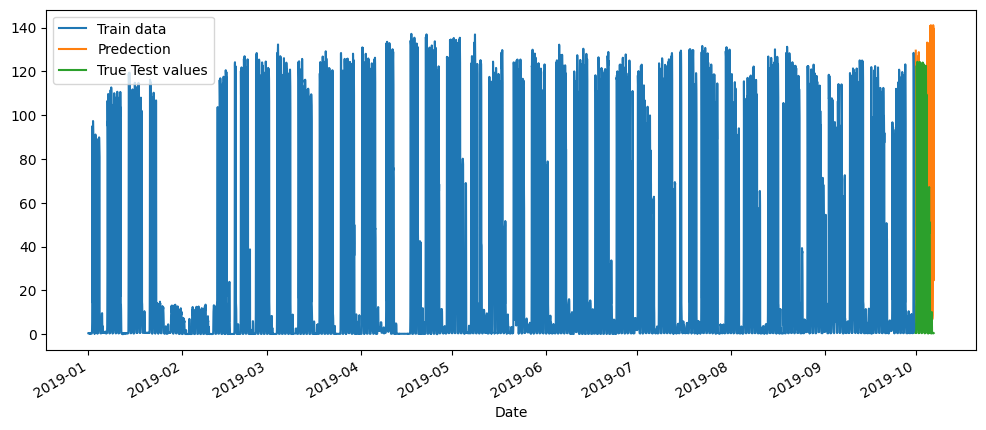

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from random import random
# contrived dataset

# fit model
model = AutoReg(df_data[feature_selected], lags=2, trend='ct', seasonal=True, period=3800)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(df_data[feature_selected])+1, len(df_data[feature_selected])+144)
df_data[feature_selected].plot(figsize = (12, 5), legend = True, label='Train data')
df_plot = pd.DataFrame(yhat.values.tolist(), index = time_range, columns= ['pred'] )
df_plot['pred'].plot(legend = True, label='Predection')
df_test[feature_selected].plot(legend = True, label = 'True Test values')

In [ ]:
from scipy import stats
z_scores = stats.zscore(df_data[feature_selected])
outliers_z = df_data[(z_scores < -3) | (z_scores > 3)]


In [ ]:
outliers_z[:10]


,total_demand_meas,weekday,hour
Date,,,


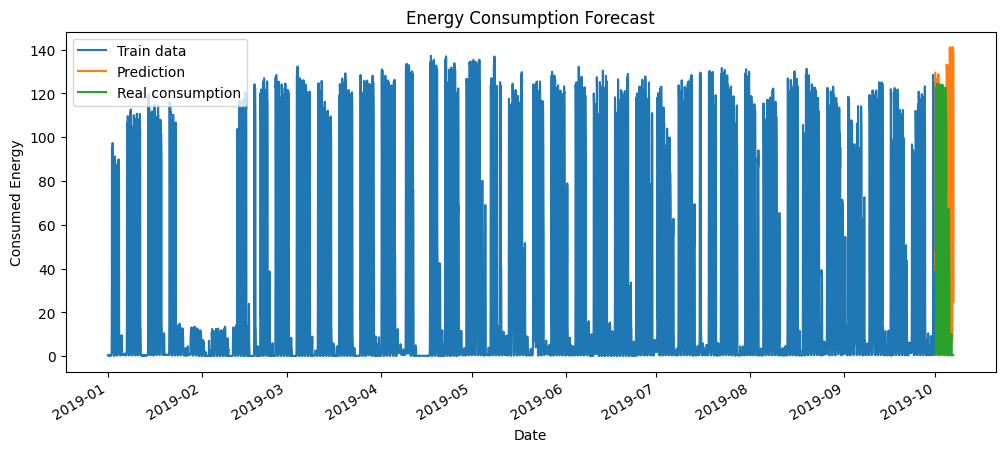

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'yhat' contains your prediction results and 'time_range' is defined
# Adjust yhat to ignore values below zero by setting them to zero
yhat_adjusted = [max(value, 0) for value in yhat]

# Create a DataFrame for plotting, using the adjusted predictions
df_plot = pd.DataFrame(yhat_adjusted, index=time_range, columns=['pred'])

# Plotting
fig, ax = plt.subplots(figsize=(12, 5))

# Plot training data
df_data[feature_selected].plot(ax=ax, legend=True, label='Train data')

# Plot adjusted predictions
df_plot['pred'].plot(ax=ax, legend=True, label='Prediction')

# Plot test data
df_test[feature_selected].plot(ax=ax, legend=True, label='Real consumption')

# Adding labels and title for clarity
ax.set_ylabel('Consumed Energy')
ax.set_xlabel('Date')
ax.set_title('Energy Consumption Forecast')

plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:440: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, 

<Axes: xlabel='Date'>

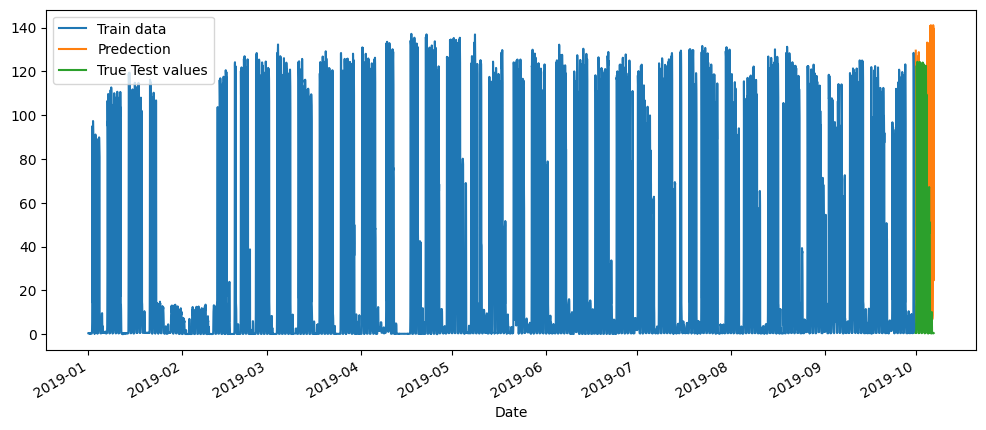

In [ ]:
yhat = model_fit.predict(len(df_data[feature_selected])+1, len(df_data[feature_selected])+144)
df_data[feature_selected].plot(figsize = (12, 5), legend = True, label='Train data')
df_plot = pd.DataFrame(yhat.values.tolist(), index = time_range, columns= ['pred'] )
df_plot['pred'].plot(legend = True, label='Predection')
df_test[feature_selected].plot(legend = True, label = 'True Test values')